In [1]:
import os
import wget

from tensorflow.keras import layers
from tensorflow.keras import Model

url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 '
filename = wget.download(url)
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

g:\computational neural networks for vision recognition\cnn\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
g:\computational neural networks for vision recognition\cnn\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
g:\computational neural networks for vision recognition\cnn\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

100% [########################################################################]           83M / 83Mlast layer output shape:  (None, 7, 7, 768)


In [2]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [4]:
#url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#filename = wget.download(url)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

#local_zip = 'cats_and_dogs_filtered.zip'

#zip_ref = zipfile.ZipFile(local_zip, 'r')

#zip_ref.extractall('cats_and_dogs_filtered')
#zip_ref.close()

# Define our example directories and files
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 509s - loss: 0.4741 - acc: 0.7670 - val_loss: 0.7406 - val_acc: 0.8280
Epoch 2/20
100/100 - 448s - loss: 0.3993 - acc: 0.8305 - val_loss: 0.2874 - val_acc: 0.9280
Epoch 3/20
100/100 - 420s - loss: 0.3520 - acc: 0.8405 - val_loss: 0.2137 - val_acc: 0.9530
Epoch 4/20
100/100 - 423s - loss: 0.3228 - acc: 0.8580 - val_loss: 0.9335 - val_acc: 0.8690
Epoch 5/20
100/100 - 422s - loss: 0.3043 - acc: 0.8670 - val_loss: 0.6279 - val_acc: 0.9030
Epoch 6/20
100/100 - 419s - loss: 0.3148 - acc: 0.8605 - val_loss: 0.5306 - val_acc: 0.9210
Epoch 7/20
100/100 - 421s - loss: 0.3065 - acc: 0.8820 - val_loss: 0.2885 - val_acc: 0.9510
Epoch 8/20
100/100 - 421s - loss: 0.2840 - acc: 0.8855 - val_loss: 0.2850 - val_acc: 0.9530
Epoch 9/20
100/100 - 422s - loss: 0.2772 - acc: 0.8890 - val_loss: 0.3908 - val_acc: 0.9420
Epoch 10/20
100/100 - 421s - loss: 0.2840 - acc: 0.8790 - val_loss: 0.7723 - val_acc: 0.9140
Epoch 11/20
100/100 - 420s - loss: 0.2721 - acc: 0.8885 - val_loss: 0.5093 - va

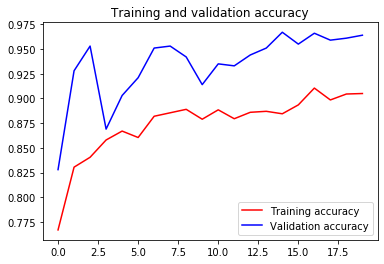

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

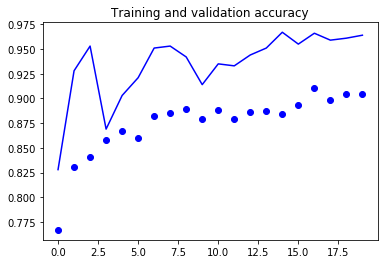

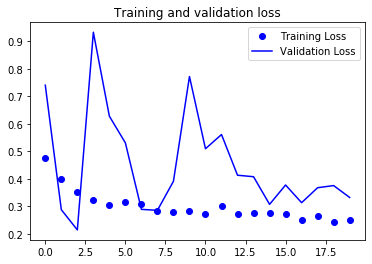

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()